In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# TASK 1: Analyze both datasets

## Analyzing Airbnb dataset

In [355]:
df_airbnb = pd.read_csv("/Users/neha.p/Desktop/Unmessenger_Internship/Assignment_3/Airbnb_Dataset.csv")
df_airbnb.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
137,31994,Room with En Suite Bathroom & Deck,137814,Waldemar,Brooklyn,Clinton Hill,40.68730,-73.96340,Private room,76,2,426,6/24/2019,3.89,3,275
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,6/1/2019,2.04,3,355
166,41513,Convenient cozy cheap apt Manhattan,181167,Lorenzo,Manhattan,Harlem,40.82704,-73.94907,Entire home/apt,80,3,2,11/2/2015,0.04,1,0
241,61167,Colorful Private One Bedroom Apt,295760,Greta,Manhattan,Little Italy,40.71961,-73.99540,Entire home/apt,135,2,21,12/12/2015,0.20,1,0
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,6/30/2019,1.92,2,0


In [356]:
df_airbnb.shape

(249, 16)

In [357]:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [358]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [359]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


### Checking for null values

In [360]:
for column in df_airbnb.columns:
    print("Count of null values in {0} = {1}".format(column,df_airbnb[column].isna().sum()))

Count of null values in id = 0
Count of null values in name = 0
Count of null values in host_id = 0
Count of null values in host_name = 0
Count of null values in neighbourhood_group = 0
Count of null values in neighbourhood = 0
Count of null values in latitude = 0
Count of null values in longitude = 0
Count of null values in room_type = 0
Count of null values in price = 0
Count of null values in minimum_nights = 0
Count of null values in number_of_reviews = 0
Count of null values in last_review = 7
Count of null values in reviews_per_month = 7
Count of null values in calculated_host_listings_count = 0
Count of null values in availability_365 = 0


#### Checking for duplicate rows

In [361]:
df_airbnb.duplicated().sum()

np.int64(0)

In [362]:
len(df_airbnb["id"].unique())==df_airbnb.shape[0]

True

In [363]:
df_airbnb.nunique()

id                                249
name                              249
host_id                           218
host_name                         204
neighbourhood_group                 5
neighbourhood                      55
latitude                          249
longitude                         245
room_type                           3
price                              86
minimum_nights                     23
number_of_reviews                 154
last_review                       129
reviews_per_month                 160
calculated_host_listings_count      6
availability_365                  152
dtype: int64

In [364]:
for column in df_airbnb.columns:
    print("Unique values of column {0} = {1}".format(column,len(df_airbnb[column].unique())))
    if(len(df_airbnb[column].unique())<10):
        print(df_airbnb[column].unique())
        print("\n")

Unique values of column id = 249
Unique values of column name = 249
Unique values of column host_id = 218
Unique values of column host_name = 204
Unique values of column neighbourhood_group = 5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Unique values of column neighbourhood = 55
Unique values of column latitude = 249
Unique values of column longitude = 245
Unique values of column room_type = 3
['Private room' 'Entire home/apt' 'Shared room']


Unique values of column price = 86
Unique values of column minimum_nights = 23
Unique values of column number_of_reviews = 154
Unique values of column last_review = 130
Unique values of column reviews_per_month = 161
Unique values of column calculated_host_listings_count = 6
[6 2 1 4 3 5]


Unique values of column availability_365 = 152


Seems like columns like id, host_id, latitude and name are mostly unique. 
Columns like neighbourhood_group, room_type and calculated_host_listings_count can be converted to one-hot enocding.

## Analyzing HR dataset

In [365]:
df_hr = pd.read_csv("/Users/neha.p/Desktop/Unmessenger_Internship/Assignment_3/HR_Dataset.csv")
df_hr.sample(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
62,"Darson, Jene'ya",10056,1,1,0,1,5,3,0,57583,0,19,Production Technician I,MA,2110,11/05/78,F,Married,US Citizen,No,White,7/2/2012,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,5.00,3,0,2/25/2019,0,1
225,"Punjabhi, Louis",10225,0,0,1,1,5,3,0,59472,0,19,Production Technician I,MA,2109,06/19/61,M,Single,US Citizen,No,White,1/6/2014,NaN,N/A-StillEmployed,Active,Production,Kelley Spirea,18.0,Employee Referral,Fully Meets,4.80,3,0,1/7/2019,0,14
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,1,20,Production Technician II,MA,2045,11/07/58,M,Single,US Citizen,No,White,1/7/2013,2/21/2016,retiring,Voluntarily Terminated,Production,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
175,"MacLennan, Samuel",10191,0,4,1,5,5,3,0,52788,1,19,Production Technician I,MA,1938,11/09/72,M,Widowed,US Citizen,No,White,9/24/2012,9/26/2017,hours,Voluntarily Terminated,Production,Amy Dunn,11.0,Indeed,Fully Meets,3.08,4,0,4/1/2017,0,18


In [366]:
df_hr.shape

(311, 36)

In [367]:
df_hr.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'], dtype='object')

In [368]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [369]:
df_hr.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


#### Checking for NULL values

In [370]:
for column in df_hr.columns:
    print("Count of null values in {0} = {1}".format(column,df_hr[column].isna().sum()))

Count of null values in Employee_Name = 0
Count of null values in EmpID = 0
Count of null values in MarriedID = 0
Count of null values in MaritalStatusID = 0
Count of null values in GenderID = 0
Count of null values in EmpStatusID = 0
Count of null values in DeptID = 0
Count of null values in PerfScoreID = 0
Count of null values in FromDiversityJobFairID = 0
Count of null values in Salary = 0
Count of null values in Termd = 0
Count of null values in PositionID = 0
Count of null values in Position = 0
Count of null values in State = 0
Count of null values in Zip = 0
Count of null values in DOB = 0
Count of null values in Sex = 0
Count of null values in MaritalDesc = 0
Count of null values in CitizenDesc = 0
Count of null values in HispanicLatino = 0
Count of null values in RaceDesc = 0
Count of null values in DateofHire = 0
Count of null values in DateofTermination = 207
Count of null values in TermReason = 0
Count of null values in EmploymentStatus = 0
Count of null values in Departmen

#### Checking for duplicate rows

In [371]:
df_hr.duplicated().sum()

np.int64(0)

In [372]:
len(df_hr["EmpID"].unique())==df_hr.shape[0]

True

In [373]:
df_hr.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [374]:
for column in df_hr.columns:
    print("Unique values of column {0} = {1}".format(column,len(df_hr[column].unique())))
    if(len(df_hr[column].unique())<20):
        print(df_hr[column].unique())
        print("\n")

Unique values of column Employee_Name = 311
Unique values of column EmpID = 311
Unique values of column MarriedID = 2
[0 1]


Unique values of column MaritalStatusID = 5
[0 1 2 4 3]


Unique values of column GenderID = 2
[1 0]


Unique values of column EmpStatusID = 5
[1 5 3 4 2]


Unique values of column DeptID = 6
[5 3 4 1 6 2]


Unique values of column PerfScoreID = 4
[4 3 2 1]


Unique values of column FromDiversityJobFairID = 2
[0 1]


Unique values of column Salary = 308
Unique values of column Termd = 2
[0 1]


Unique values of column PositionID = 30
Unique values of column Position = 32
Unique values of column State = 28
Unique values of column Zip = 158
Unique values of column DOB = 307
Unique values of column Sex = 2
['M ' 'F']


Unique values of column MaritalDesc = 5
['Single' 'Married' 'Divorced' 'Widowed' 'Separated']


Unique values of column CitizenDesc = 3
['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']


Unique values of column HispanicLatino = 4
['No' 'Yes' 'no' '

HispanicLatino column can be cleaned to have only lowercase values

# TASK 2: Data Cleaning

## Airbnb Dataset

renaming all columns to a std format without spaces

In [375]:
df_airbnb.columns=[col.lower().replace(" ","_") for col in df_airbnb.columns]
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [376]:
df_airbnb.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
87,20299,Oh glorious spring!,62407,Edward,Manhattan,East Village,40.72334,-73.9844,Private room,60,3,194,6/30/2019,1.73,1,26


Removing columns like id and host_id

In [377]:
df_airbnb.drop(columns=["id","host_id"],axis=1,inplace=True)

In [378]:
df_airbnb.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [379]:
# df_airbnb.sample()
# df = df_airbnb.copy(deep=True)
# df.columns
# df = pd.get_dummies(df, columns=["neighbourhood_group", "room_type"], drop_first=True)
# df.columns

## HR Dataset

#### Formatting HispanicLatino column values to all lowercase

In [380]:
df_hr.HispanicLatino.unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [381]:
df_hr.HispanicLatino = [value.lower() for value in df_hr.HispanicLatino]

In [382]:
df_hr.HispanicLatino.unique()

array(['no', 'yes'], dtype=object)

# TASK 3 & 4: Data visualisation with context

## Airbnb Dataset

In [383]:
# sns.pairplot(df)
# sns.pairplot(df_airbnb)

### Let's plot the correlation between columns

In [384]:
df_airbnb.corr(numeric_only = True)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.163688,-0.076422,0.000398,0.000859,0.012500,-0.089450,0.066022
longitude,0.163688,1.000000,-0.235756,-0.042712,-0.074639,-0.028061,0.176826,0.067338
price,-0.076422,-0.235756,1.000000,0.051217,-0.206950,-0.232512,-0.131999,0.010685
minimum_nights,0.000398,-0.042712,0.051217,1.000000,-0.128352,-0.131060,-0.111958,-0.069384
number_of_reviews,0.000859,-0.074639,-0.206950,-0.128352,1.000000,0.906222,0.100252,0.034783
reviews_per_month,0.012500,-0.028061,-0.232512,-0.131060,0.906222,1.000000,0.060684,-0.027552
calculated_host_listings_count,-0.089450,0.176826,-0.131999,-0.111958,0.100252,0.060684,1.000000,0.332870
availability_365,0.066022,0.067338,0.010685,-0.069384,0.034783,-0.027552,0.332870,1.000000


<Axes: >

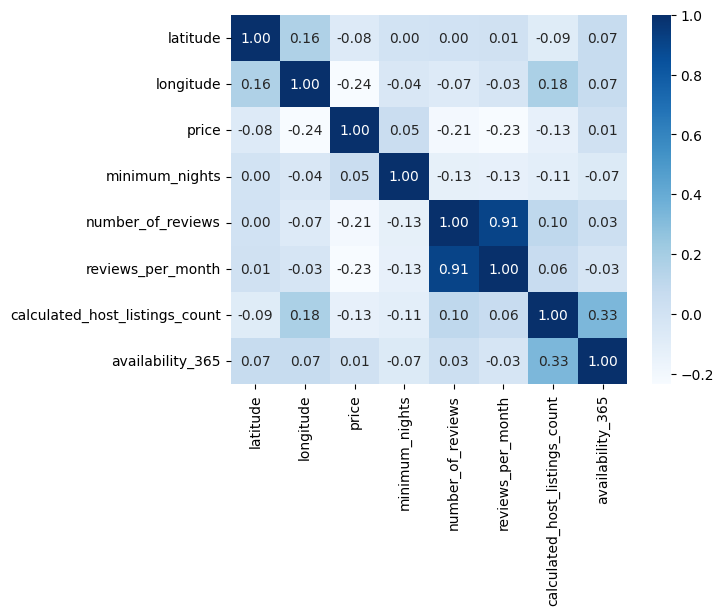

In [385]:
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(numeric_only = True), cmap="Blues", annot=True, fmt=".2f",) #crest
sns.heatmap(df_airbnb.corr(numeric_only = True), cmap="Blues", annot=True, fmt=".2f") #crest

### Top 10 hosts

/var/folders/gm/q7z6ym615db6cb9y3s06mzfw0000gn/T/ipykernel_17309/1900954796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


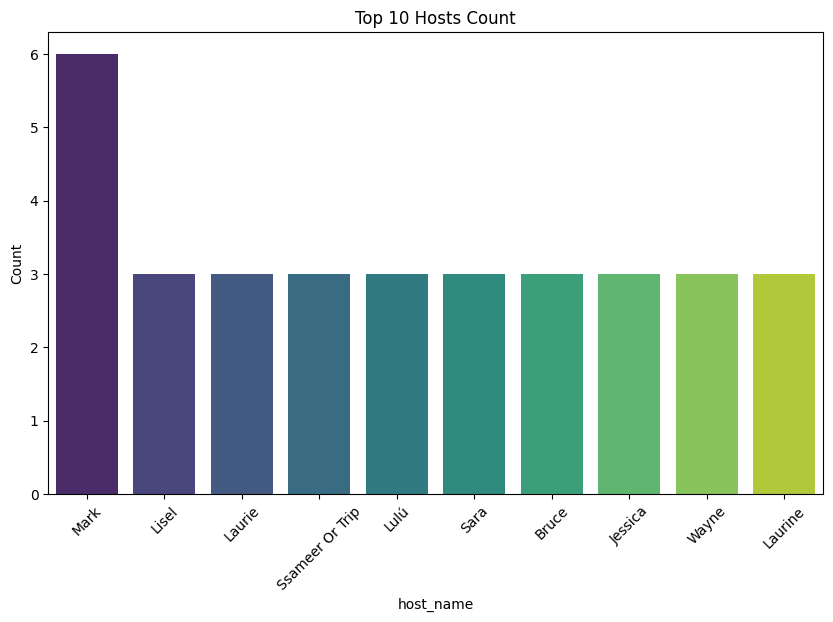

In [386]:
top_categories = df_airbnb['host_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Hosts Count')
plt.xlabel('host_name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of airbnb prices for different neighborhoods

<Axes: xlabel='room_type', ylabel='price'>

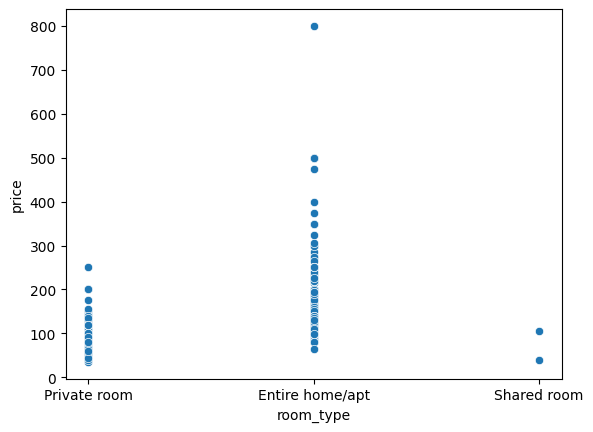

In [387]:
sns.scatterplot(data=df_airbnb, x="room_type", y="price")

### Representation of how price varies in different neighbourhood groups

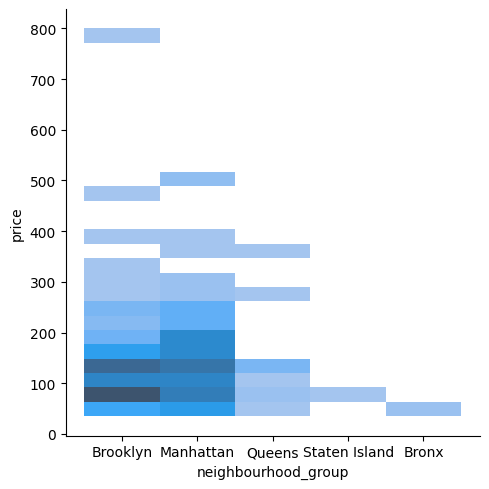

In [388]:
sns.displot(data=df_airbnb, x="neighbourhood_group", y="price") #, hue="room_type") #, style="")

### Variation of price with room type

<Axes: xlabel='room_type', ylabel='price'>

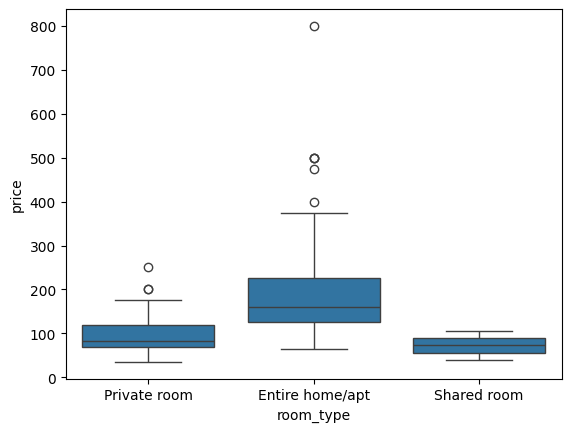

In [389]:
sns.boxplot(data=df_airbnb, x="room_type", y="price") #, hue="room_type") #, style="")

### Distribution of data with respect of the neighborhood and the room type

<Axes: xlabel='neighbourhood_group', ylabel='count'>

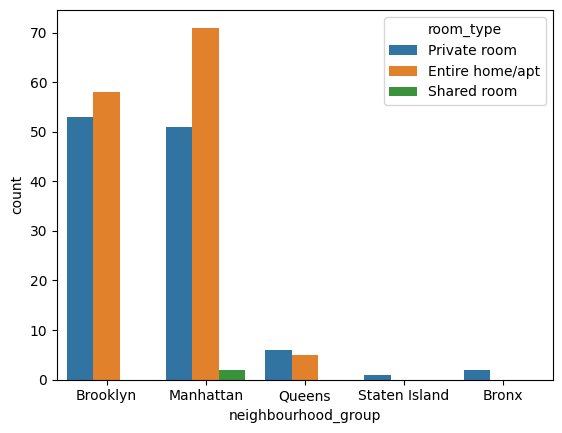

In [390]:
sns.countplot(data=df_airbnb, x="neighbourhood_group", hue="room_type")

### Share of each room types available in the market

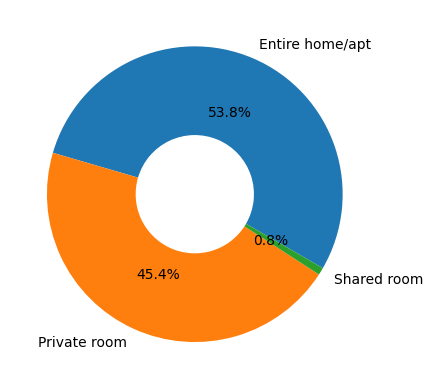

In [391]:
s = df_airbnb.room_type.value_counts()

plt.pie(s, labels=s.index, autopct='%1.1f%%', wedgeprops=dict(width=0.6), startangle=-30)
plt.show()

### Availability out of 365 days for each room type

<Axes: xlabel='availability_365', ylabel='Count'>

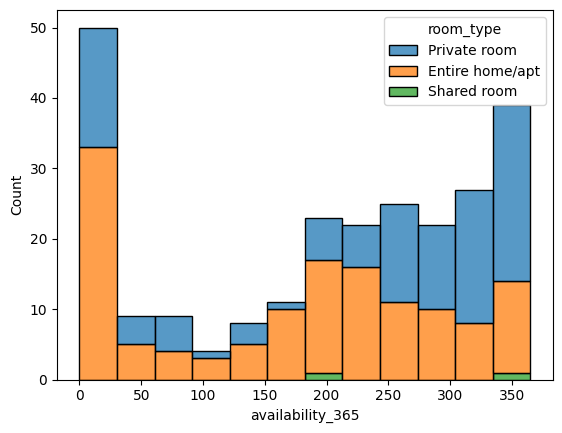

In [392]:
sns.histplot(data=df_airbnb, x="availability_365", bins=12, hue="room_type", multiple="stack")

### Relation between minimum nights needed to spend at each room type

/var/folders/gm/q7z6ym615db6cb9y3s06mzfw0000gn/T/ipykernel_17309/3925179516.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=df_airbnb, x="minimum_nights", hue="room_type", errwidth=0)


<Axes: xlabel='minimum_nights'>

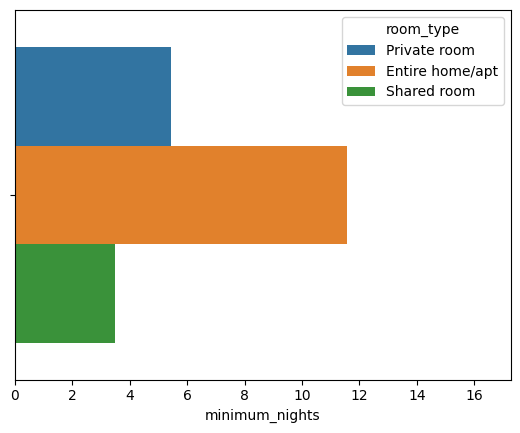

In [393]:
sns.barplot(data=df_airbnb, x="minimum_nights", hue="room_type", errwidth=0)

### Relationship between price and minimum nights

<Axes: xlabel='minimum_nights', ylabel='price'>

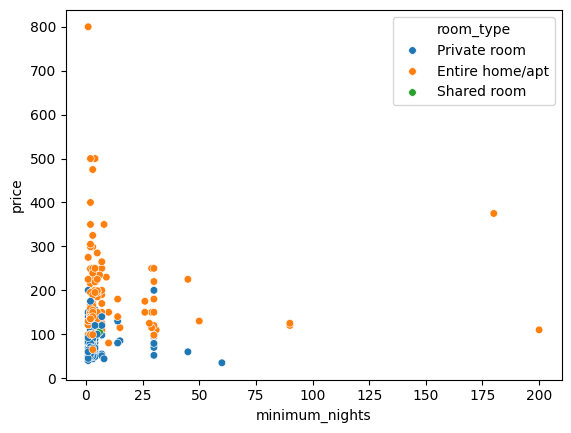

In [394]:
sns.scatterplot(y=df_airbnb.price, x=df_airbnb.minimum_nights, hue=df_airbnb.room_type, s=30)

## HR Dataset

#### Let's start with plotting the number of missing values

/var/folders/gm/q7z6ym615db6cb9y3s06mzfw0000gn/T/ipykernel_17309/930717816.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(df_hr.isna(), width=1, orient='v', errwidth = 0)


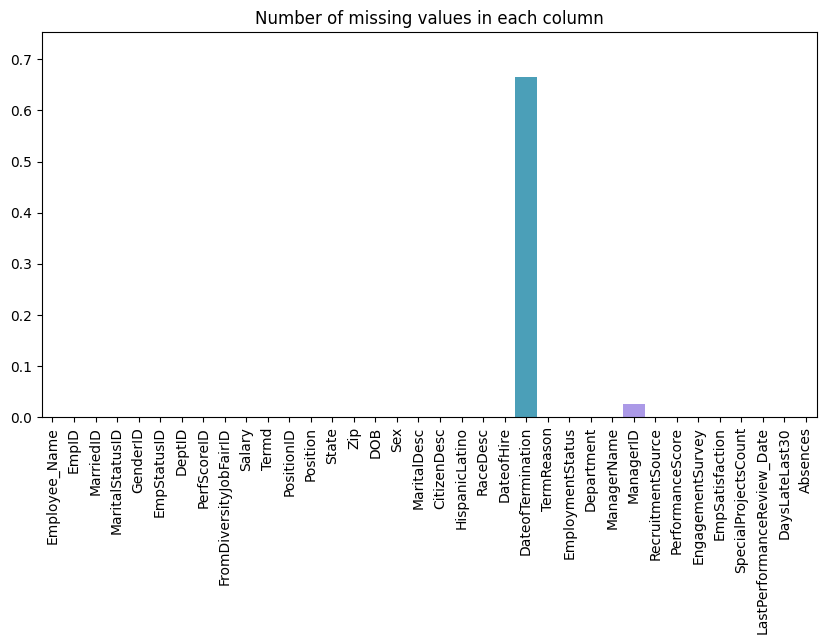

In [395]:
plt.figure(figsize=(10, 5))
sns.barplot(df_hr.isna(), width=1, orient='v', errwidth = 0)
plt.xticks(rotation=90)
plt.title("Number of missing values in each column")
plt.show()

#### Correlation matrix will give us an idea about how the different fields are related to each other

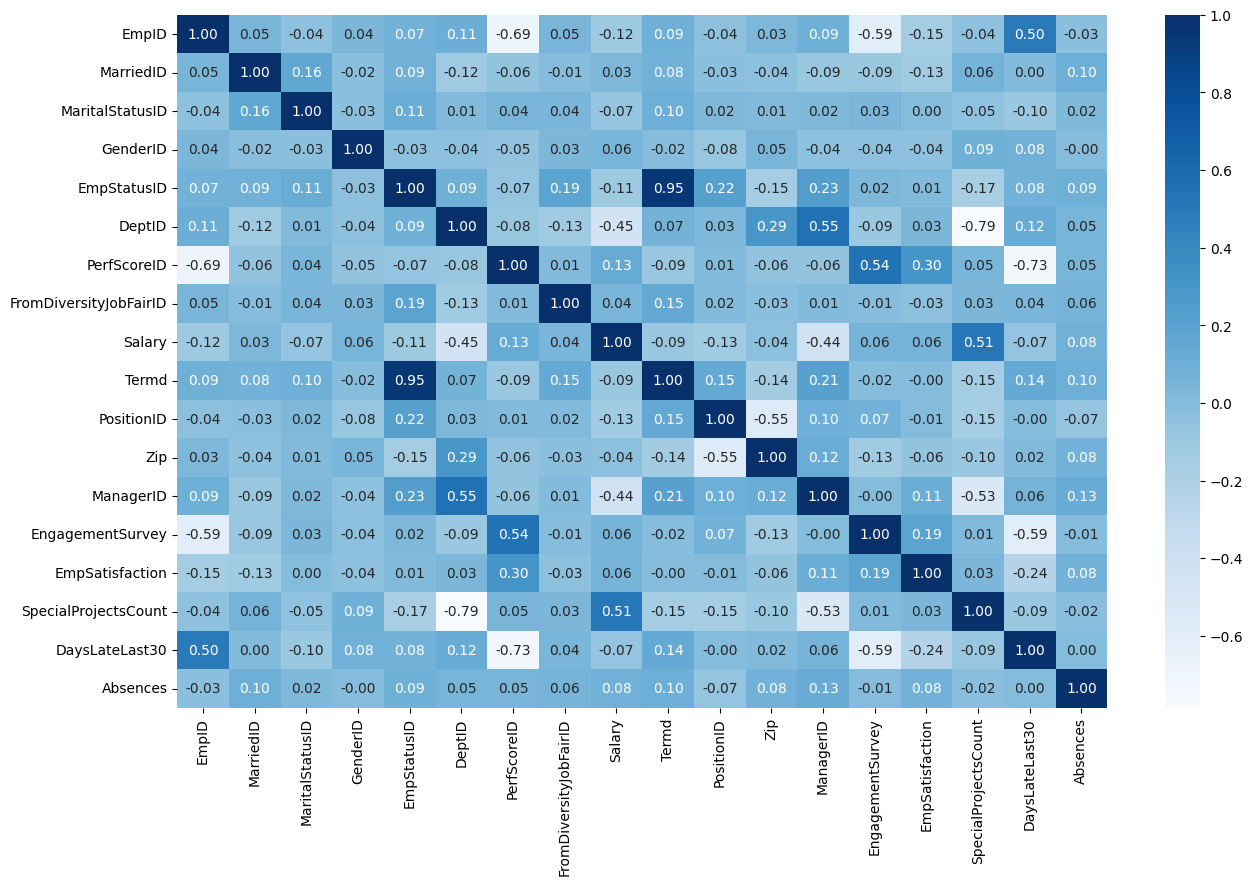

In [396]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_hr.corr(numeric_only = True), cmap="Blues", annot=True, fmt=".2f") #crest
plt.show()

#### Distribution of marital status among the employee population

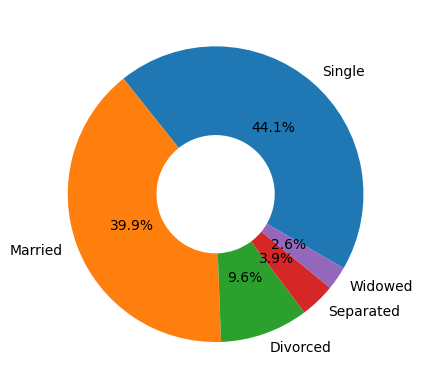

In [397]:
s = df_hr.MaritalDesc.value_counts()

plt.pie(s, labels=s.index, autopct='%1.1f%%', wedgeprops=dict(width=0.6), startangle=-30)
plt.show()

#### Top reason for being terminated

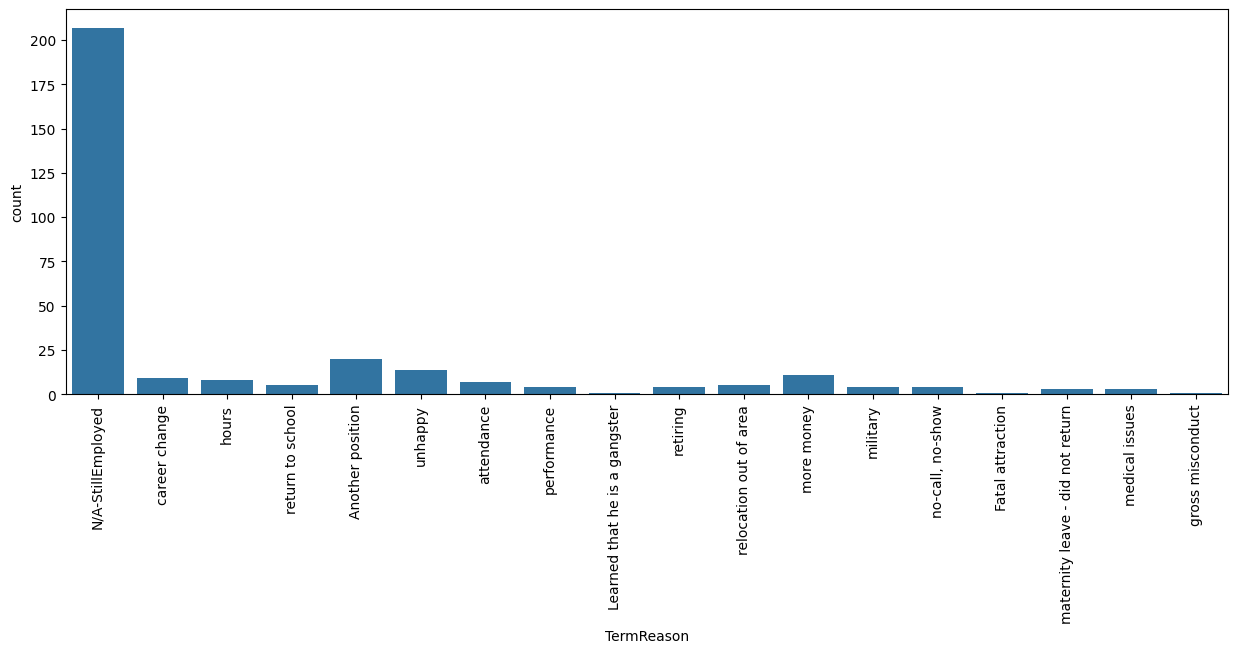

In [398]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_hr, x="TermReason")
plt.xticks(rotation=90)
plt.show()

#### Top source of recruitment and their relative performances

<Figure size 500x500 with 0 Axes>

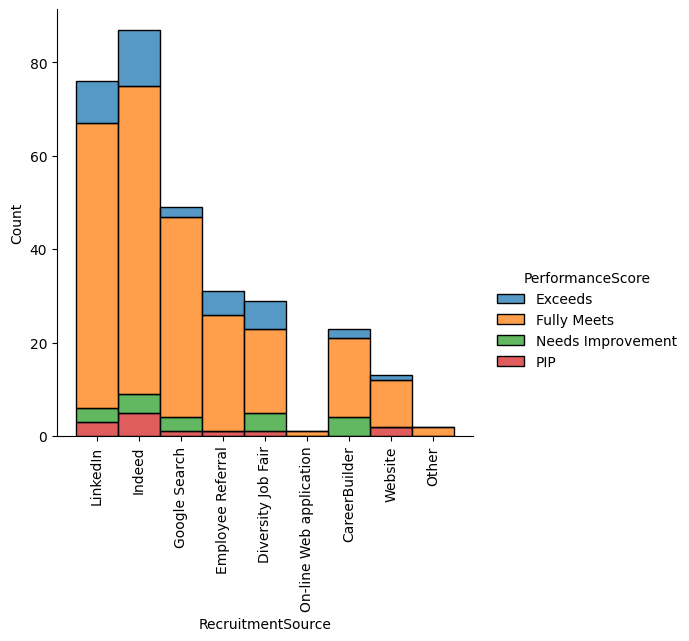

In [399]:
plt.figure(figsize=(5, 5))
sns.displot(data=df_hr, x="RecruitmentSource", hue="PerformanceScore", multiple="stack") 
plt.xticks(rotation=90)
plt.show()

#### Performance score distribution among employees

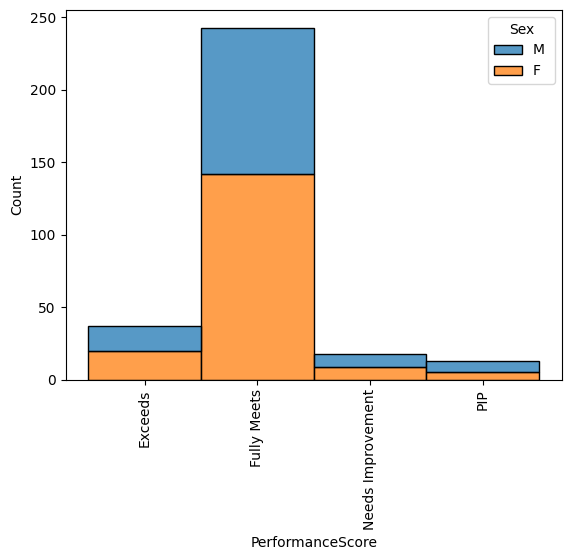

In [400]:
sns.histplot(data=df_hr, x="PerformanceScore", hue="Sex", multiple="stack") 
plt.xticks(rotation=90)
plt.show()

#### Employment status across various departments

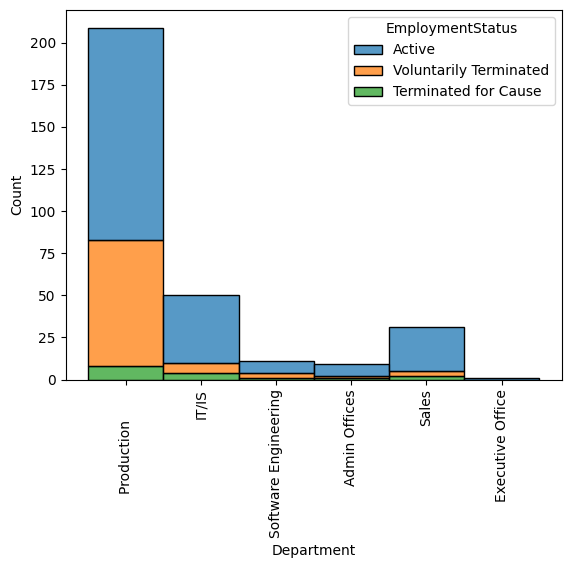

In [401]:
sns.histplot(data=df_hr, x="Department", hue="EmploymentStatus", multiple="stack") 
plt.xticks(rotation=90)
plt.show()

#### Distribution of genders across various departments and their salary

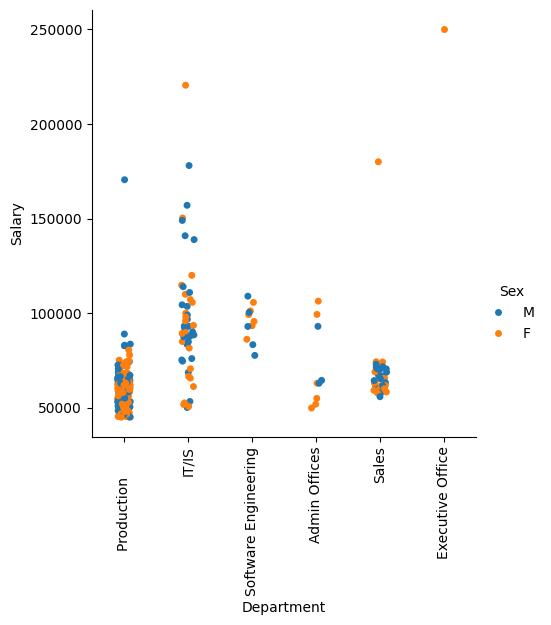

In [402]:
sns.catplot(x=df_hr.Department, y=df_hr.Salary, hue=df_hr.Sex, kind="strip")
plt.xticks(rotation=90)
plt.show()

#### Distribution of races and salary

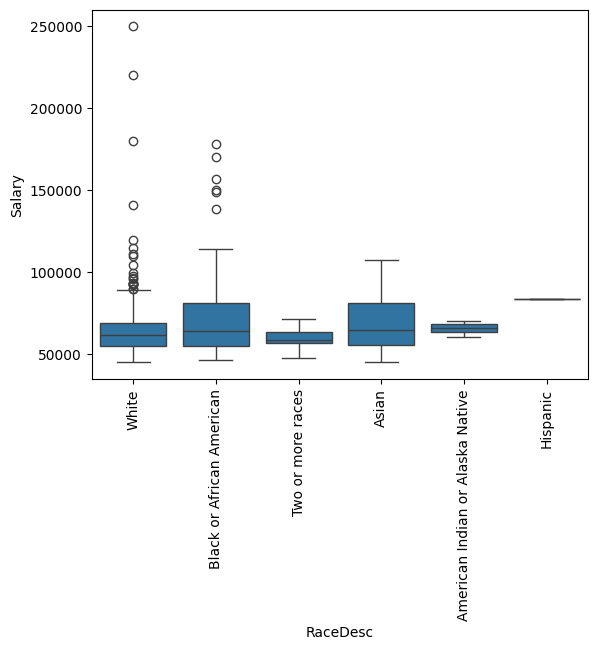

In [403]:
sns.boxplot(data=df_hr, x="RaceDesc", y="Salary")
plt.xticks(rotation=90)
plt.show()

#### Which departments have higher salaries

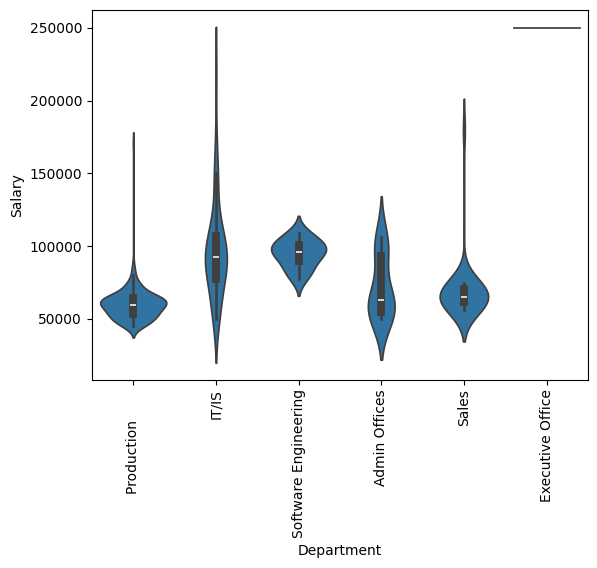

In [404]:
sns.violinplot(data=df_hr, x="Department", y="Salary")
plt.xticks(rotation=90)
plt.show()

#### Which departments have highest satisfaction rates

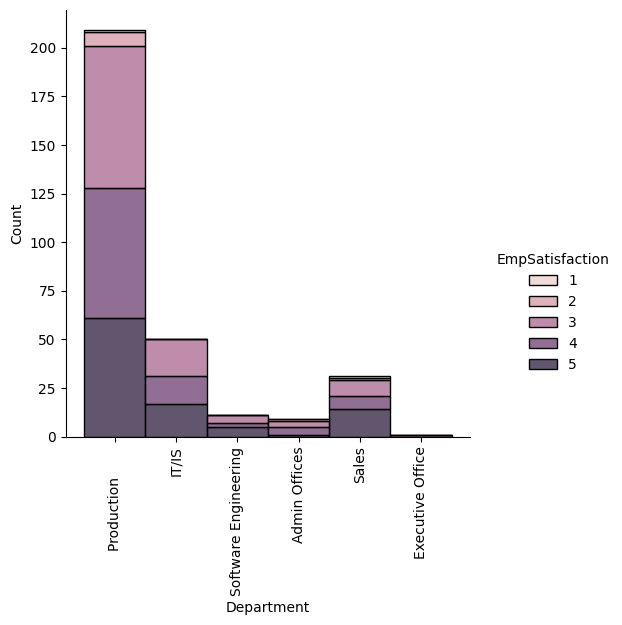

In [405]:
sns.displot(x=df_hr.Department, hue=df_hr.EmpSatisfaction, multiple="stack")
plt.xticks(rotation=90)
plt.show()